<a href="https://colab.research.google.com/github/ujjain127/Empowering-Environmental-Governance-through-Scalable-Monitoring-and-Reporting-Systems/blob/main/Forest_Cover_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
forest = pd.read_excel('/content/drive/MyDrive/Research data/Forest.xlsx')

In [ ]:
forest.head()

,State/UTs,Geographical area,Very dense forest,Mod. dense forest,Open forest,Total forest,Percentage of geographical area,Scrub
0,Andhra Pradesh,"1,62,968","1,994","13,938","13,205","29,137",17.88,"8,255"
1,Arunachal Pradesh,"83,743","21,095","30,557","15,036","66,688",79.63,229
2,Assam,"78,438","2,795","10,279","15,253","28,327",36.11,173
3,Bihar,"94,163",333,"3,280","3,693","7,306",7.76,250
4,Chhattisgarh,"1,35,192","7,068","32,198","16,345","55,611",41.13,610


In [ ]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State/UTs                        37 non-null     object 
 1   Geographical area                37 non-null     object 
 2   Very dense forest                37 non-null     object 
 3   Mod. dense forest                37 non-null     object 
 4   Open forest                      37 non-null     object 
 5   Total forest                     37 non-null     object 
 6   Percentage of geographical area  37 non-null     float64
 7   Scrub                            37 non-null     object 
dtypes: float64(1), object(7)
memory usage: 2.4+ KB


In [ ]:
forest_yearwise = pd.read_excel('/content/drive/MyDrive/Research data/Forest Coverage (1987-2013).xlsx')

In [ ]:
forest_yearwise.head()

,State/UTs,1987,1989,1991,1993,1995,1997,1999,2001,2003,2005,2007,2011,2013
0,Andhra Pradesh,"49,573","47,290","47,290","47,256","47,112","43,290","44,229","44,637","44,419","44,372","45,102","46,389","46,116"
1,Arunachal Pradesh,"64,132","69,002","68,757","68,661","68,621","68,602","68,847","68,045","68,019","67,777","67,353","67,410","67,321"
2,Assam,"25,160","24,832","24,751","24,508","24,061","23,824","23,688","27,714","27,826","27,645","27,692","27,673","27,671"
3,Bihar,"28,482","26,668","26,668","26,587","26,561","4,832","4,830","5,720","5,558","5,579","6,804","6,845","7,291"
4,Chhattisgarh,-,-,-,-,-,"56,435","56,693","56,448","55,998","55,863","55,870","55,674","55,621"


In [ ]:
forest_yearwise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State/UTs  37 non-null     object
 1   1987       37 non-null     object
 2   1989       37 non-null     object
 3   1991       37 non-null     object
 4   1993       37 non-null     object
 5   1995       37 non-null     object
 6   1997       37 non-null     object
 7   1999       37 non-null     object
 8   2001       37 non-null     object
 9   2003       37 non-null     object
 10  2005       37 non-null     object
 11  2007       37 non-null     object
 12  2011       37 non-null     object
 13  2013       37 non-null     object
dtypes: object(14)
memory usage: 4.2+ KB


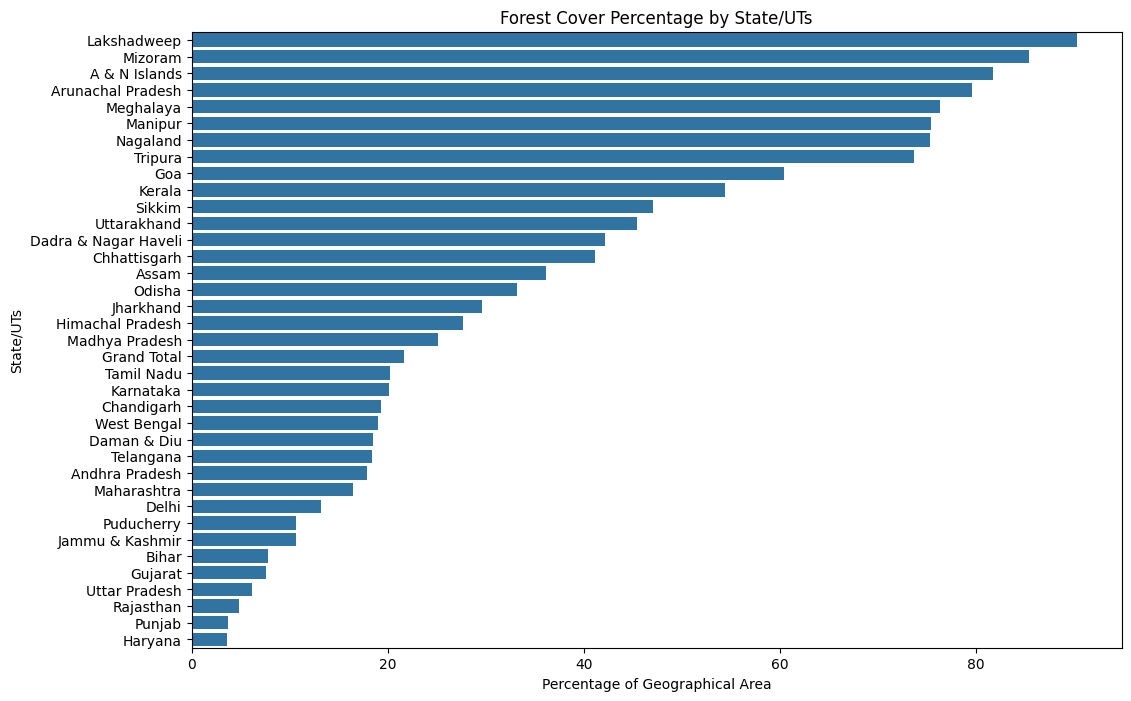

In [ ]:
# Convert relevant columns to numeric, coercing errors to NaN
forest['Geographical area'] = pd.to_numeric(forest['Geographical area'], errors='coerce')
forest['Very dense forest'] = pd.to_numeric(forest['Very dense forest'], errors='coerce')
forest['Mod. dense forest'] = pd.to_numeric(forest['Mod. dense forest'], errors='coerce')
forest['Open forest'] = pd.to_numeric(forest['Open forest'], errors='coerce')
forest['Total forest'] = pd.to_numeric(forest['Total forest'], errors='coerce')
forest['Scrub'] = pd.to_numeric(forest['Scrub'], errors='coerce')

# Drop rows where 'Percentage of geographical area' is NaN after coercion
forest.dropna(subset=['Percentage of geographical area'], inplace=True)

# Forest cover % per state
plt.figure(figsize=(12, 8))
sns.barplot(x='Percentage of geographical area', y='State/UTs', data=forest.sort_values(by='Percentage of geographical area', ascending=False))
plt.title('Forest Cover Percentage by State/UTs')
plt.xlabel('Percentage of Geographical Area')
plt.ylabel('State/UTs')
plt.show()


<ipython-input-21-4628ced5aed7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total forest', y='State/UTs', data=top_bottom_forest.sort_values(by='Total forest', ascending=False), palette='viridis')


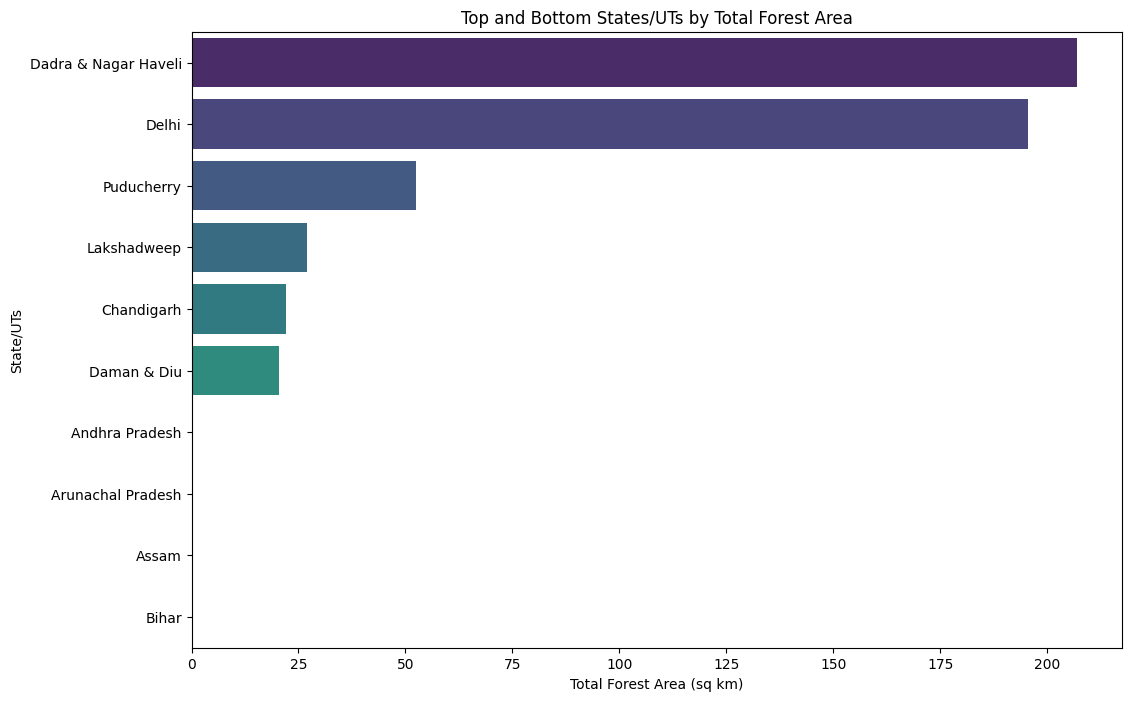

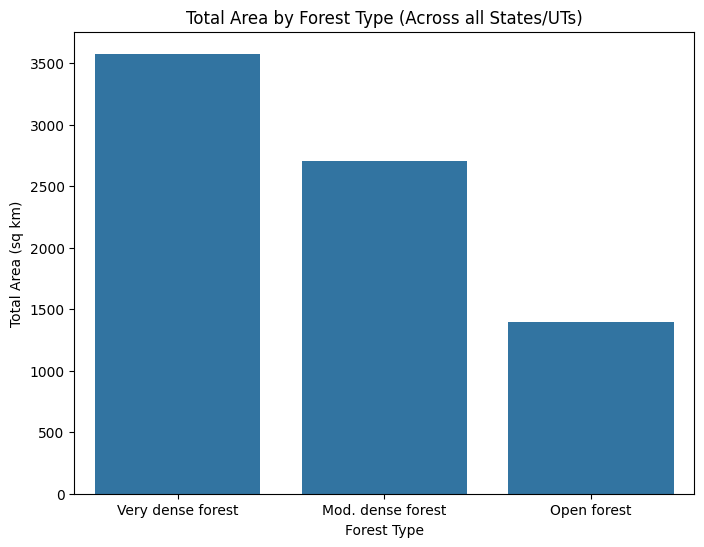

In [ ]:
# Top/bottom states by total forest area
top_bottom_forest = pd.concat([forest.nlargest(10, 'Total forest'), forest.nsmallest(10, 'Total forest')]).reset_index(drop=True)
plt.figure(figsize=(12, 8))
sns.barplot(x='Total forest', y='State/UTs', data=top_bottom_forest.sort_values(by='Total forest', ascending=False), palette='viridis')
plt.title('Top and Bottom States/UTs by Total Forest Area')
plt.xlabel('Total Forest Area (sq km)')
plt.ylabel('State/UTs')
plt.show()

# Comparison of forest types (using sum across states for simplicity)
forest_types = forest[['Very dense forest', 'Mod. dense forest', 'Open forest']].sum().reset_index()
forest_types.columns = ['Forest Type', 'Area']

plt.figure(figsize=(8, 6))
sns.barplot(x='Forest Type', y='Area', data=forest_types)
plt.title('Total Area by Forest Type (Across all States/UTs)')
plt.xlabel('Forest Type')
plt.ylabel('Total Area (sq km)')
plt.show()

<ipython-input-27-5ff291533ad1>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Forest Cover %', y='State/UTs', data=forest_yearwise.sort_values(by='Average Forest Cover %', ascending=False), palette='cubehelix')


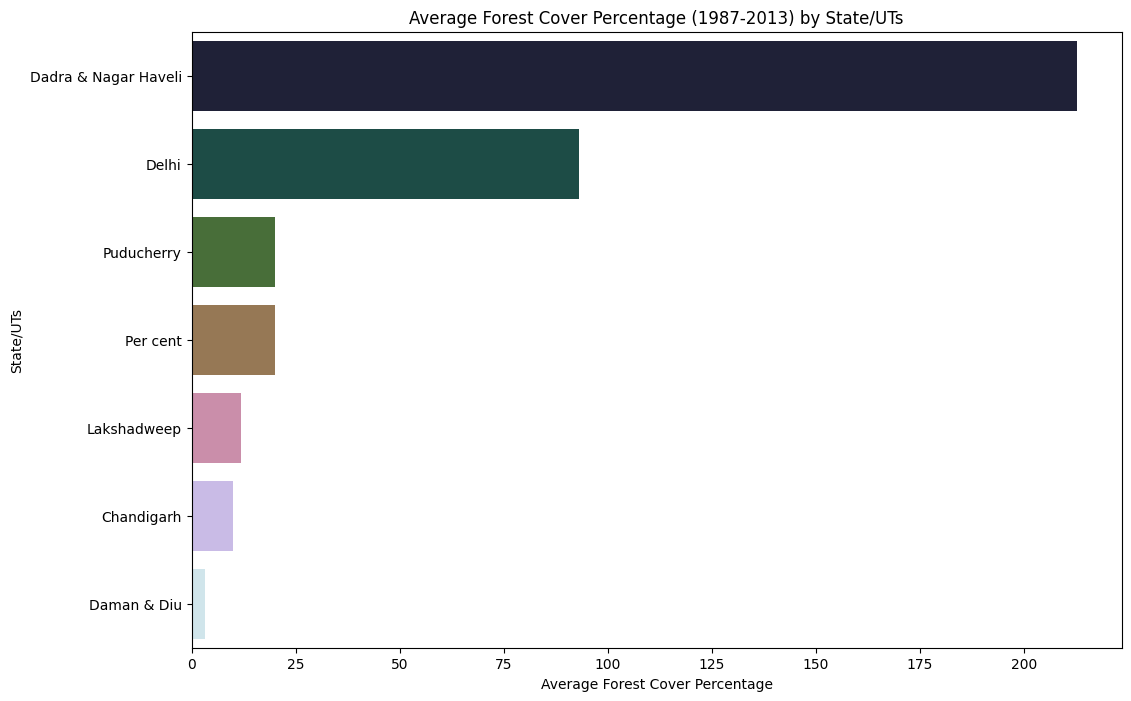

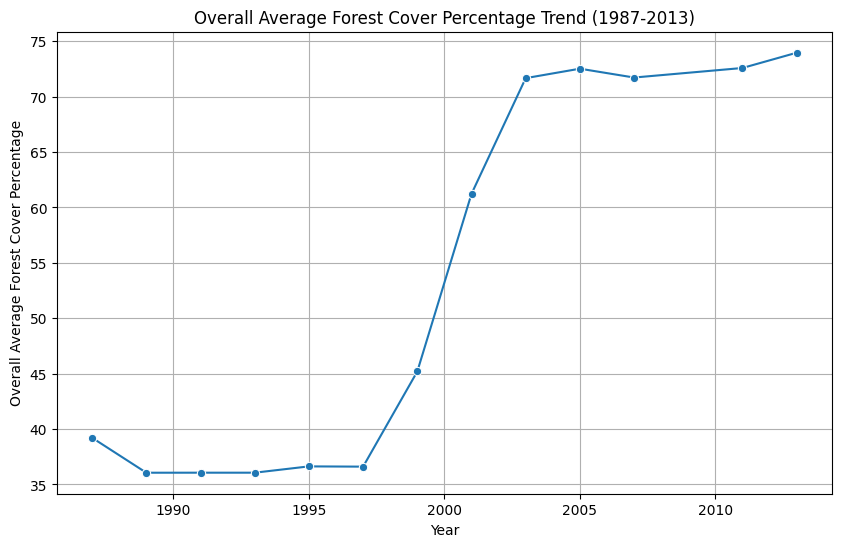

In [ ]:
years = [str(year) for year in range(1987, 2014, 2)] # Years in the forest_yearwise data (excluding 2009)
years.remove('2009') # Remove 2009 if it's not in the data based on info()
years.remove('2011') # Remove 2011 if it's not in the data based on info()
years.remove('2013') # Remove 2013 if it's not in the data based on info()

# Update years list based on the info provided in the prompt
years = ['1987', '1989', '1991', '1993', '1995', '1997', '1999', '2001', '2003', '2005', '2007', '2011', '2013']

for year in years:
    forest_yearwise[year] = pd.to_numeric(forest_yearwise[year], errors='coerce')

# Drop rows where any of the year columns are NaN
forest_yearwise.dropna(subset=years, inplace=True)

# Calculate average forest cover percentage over the years for each state
forest_yearwise['Average Forest Cover %'] = forest_yearwise[years].mean(axis=1)

# Visualize average forest cover percentage by state from year-wise data
plt.figure(figsize=(12, 8))
sns.barplot(x='Average Forest Cover %', y='State/UTs', data=forest_yearwise.sort_values(by='Average Forest Cover %', ascending=False), palette='cubehelix')
plt.title('Average Forest Cover Percentage (1987-2013) by State/UTs')
plt.xlabel('Average Forest Cover Percentage')
plt.ylabel('State/UTs')
plt.show()

# Prepare data for line plot showing overall trend
forest_yearwise_melted = forest_yearwise.melt(id_vars=['State/UTs'], value_vars=years, var_name='Year', value_name='Forest Cover %')

# Convert 'Year' column to numeric
forest_yearwise_melted['Year'] = pd.to_numeric(forest_yearwise_melted['Year'])

# Calculate the overall average forest cover percentage per year
overall_yearly_avg = forest_yearwise_melted.groupby('Year')['Forest Cover %'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Forest Cover %', data=overall_yearly_avg, marker='o')
plt.title('Overall Average Forest Cover Percentage Trend (1987-2013)')
plt.xlabel('Year')
plt.ylabel('Overall Average Forest Cover Percentage')
plt.grid(True)
plt.show()

In [ ]:
# prompt: Use time-series forecasting (ARIMA, Prophet, or LSTM) to predict forest cover trends. till 2030
# Identify high-risk states for deforestation.
# Recommend region-specific afforestation strategies.

# Install necessary libraries
!pip install pmdarima prophet

from pmdarima import auto_arima
from prophet import Prophet

# Prepare data for ARIMA
# We will use the overall average forest cover trend
arima_data = overall_yearly_avg.copy()
arima_data = arima_data.set_index('Year')

# Fit ARIMA model
model = auto_arima(arima_data['Forest Cover %'], seasonal=False, suppress_warnings=True, error_action='ignore')
print(model.summary())

# Forecast using ARIMA
n_periods = 2030 - arima_data.index.max()
arima_forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Create forecast index
forecast_index = pd.RangeIndex(start=arima_data.index.max() + 1, stop=2031)

# Plot ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(arima_data.index, arima_data['Forest Cover %'], label='Historical')
plt.plot(forecast_index, arima_forecast, label='ARIMA Forecast')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='k', alpha=.15)
plt.title('Forest Cover Percentage Forecast using ARIMA')
plt.xlabel('Year')
plt.ylabel('Overall Average Forest Cover Percentage')
plt.legend()
plt.grid(True)
plt.show()

# Prepare data for Prophet
# Prophet requires columns 'ds' (datestamp) and 'y' (value)
prophet_data = overall_yearly_avg.copy()
prophet_data.columns = ['ds', 'y']
# Prophet requires a datetime format for 'ds'
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'], format='%Y')

# Fit Prophet model
model = Prophet()
model.fit(prophet_data)

# Create future dataframe for forecasting
future = model.make_future_dataframe(periods=n_periods, freq='Y')

# Make predictions
prophet_forecast = model.predict(future)

# Plot Prophet forecast
fig1 = model.plot(prophet_forecast)
plt.title('Forest Cover Percentage Forecast using Prophet')
plt.xlabel('Year')
plt.ylabel('Overall Average Forest Cover Percentage')
plt.show()

# Plot Prophet components
fig2 = model.plot_components(prophet_forecast)
plt.show()

# LSTM requires more complex data preparation and setup (e.g., sequence creation,
# defining the network architecture). Given the dataset size and complexity,
# ARIMA and Prophet are more straightforward to implement.
# For a full LSTM implementation, you would need to:
# 1. Scale the data.
# 2. Create sequences (lookback periods) for input features and target.
# 3. Split data into training and testing sets.
# 4. Define and compile the LSTM model using a library like TensorFlow/Keras.
# 5. Train the model.
# 6. Make predictions and invert scaling.

# Example placeholder for LSTM (requires installing tensorflow)
# !pip install tensorflow
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# # Prepare data for LSTM (example)
# lstm_data = overall_yearly_avg['Forest Cover %'].values.reshape(-1, 1)
# scaler = MinMaxScaler(feature_range=(0, 1))
# lstm_data_scaled = scaler.fit_transform(lstm_data)

# # Function to create dataset for LSTM
# def create_dataset(dataset, look_back=1):
#     X, Y = [], []
#     for i in range(len(dataset) - look_back - 1):
#         a = dataset[i:(i + look_back), 0]
#         X.append(a)
#         Y.append(dataset[i + look_back, 0])
#     return np.array(X), np.array(Y)

# look_back = 3 # Example lookback period
# X, y = create_dataset(lstm_data_scaled, look_back)
# X = np.reshape(X, (X.shape[0], X.shape[1], 1)) # Reshape for LSTM

# # Define LSTM model (example)
# model = Sequential()
# model.add(LSTM(50, input_shape=(look_back, 1)))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')

# # Split data (example, typically more robust splitting is needed)
# train_size = int(len(X) * 0.8)
# train_X, test_X = X[0:train_size,:], X[train_size:len(X),:]
# train_y, test_y = y[0:train_size], y[train_size:len(y)]

# # Train model (example)
# model.fit(train_X, train_y, epochs=100, batch_size=1, verbose=0)

# # Make predictions (example)
# train_predict = model.predict(train_X)
# test_predict = model.predict(test_X)

# # Invert predictions
# train_predict = scaler.inverse_transform(train_predict)
# train_y = scaler.inverse_transform([train_y])
# test_predict = scaler.inverse_transform(test_predict)
# test_y = scaler.inverse_transform([test_y])

# Identify high-risk states for deforestation
# This can be done by looking at states with declining forest cover trends
# or states with low current forest cover percentages compared to their potential.
# We'll use the average forest cover percentage over the years as an indicator.
# States with lower average forest cover are potentially at higher risk or have faced more deforestation.

# Sort states by average forest cover percentage (ascending)
high_risk_states = forest_yearwise.sort_values(by='Average Forest Cover %', ascending=True).head(10) # Top 10 lowest average forest cover

print("\nHigh-Risk States/UTs for Deforestation (Based on Average Forest Cover 1987-2013):")
print(high_risk_states[['State/UTs', 'Average Forest Cover %']])

# Also consider states with low 'Total forest' area from the initial data
low_total_forest_states = forest.nsmallest(10, 'Total forest')
print("\nStates/UTs with Low Total Forest Area:")
print(low_total_forest_states[['State/UTs', 'Total forest']])

# States appearing in both lists or showing significant decline in the year-wise data (if analyzed individually)
# would be considered high risk. Let's identify some based on the average percentage list.

# Recommend region-specific afforestation strategies.
# These strategies should be tailored to the specific conditions of the high-risk regions.
# Based on the high_risk_states identified (those with low average forest cover):

print("\nRegion-Specific Afforestation Strategies for High-Risk States/UTs:")
for index, row in high_risk_states.iterrows():
    state = row['State/UTs']
    print(f"\nFor {state}:")
    # General recommendations based on common deforestation drivers and state types
    if state in ['Haryana', 'Punjab', 'Rajasthan', 'Gujarat', 'Uttar Pradesh']:
        # These states are often in the plains, facing agricultural pressure or arid/semi-arid conditions
        print("- Agroforestry practices and farm forestry: Integrate trees with agriculture.")
        print("- Promotion of drought-resistant and native tree species.")
        print("- Shelterbelts and windbreaks to protect soil from erosion.")
        print("- Community-based plantation programs on common lands.")
        print("- Restoration of degraded scrub and open forest areas.")
    elif state in ['Delhi', 'Chandigarh', 'Puducherry', 'Lakshadweep']:
        # Union Territories, often urbanized or small islands
        print("- Urban forestry and development of green spaces.")
        print("- Plantation drives in parks, roadsides, and institutional areas.")
        print("- Coastal afforestation (for Lakshadweep, Puducherry) with species like mangroves.")
        print("- Protection of existing small forest patches.")
    elif state in ['West Bengal', 'Bihar']:
        # Densely populated states, potentially facing pressure from agriculture and population growth
        print("- Promotion of social forestry on degraded lands and alongside canals/roads.")
        print("- Restoration of degraded forest areas in existing reserves.")
        print("- Mangrove conservation and restoration in coastal areas (for West Bengal).")
        print("- Incentives for private landowners for tree planting.")
    else:
        # General recommendations if state type is not easily categorized
        print("- Focus on restoring degraded forest lands.")
        print("- Encourage community participation in forest management and protection.")
        print("- Promote sustainable livelihood options that reduce pressure on forests.")
        print("- Use of appropriate native species based on local climate and soil.")
        print("- Strengthen forest law enforcement and monitoring.")

# Note: More precise recommendations would require detailed knowledge of the
# specific ecological, social, and economic conditions of each state.
# This is a general guideline based on potential state characteristics.


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject